# Using KMeans for customer segmentation

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ifood_df.csv")
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
print("Data Shape is: ", df.shape)

Data Shape is:  (2205, 39)


In [5]:
print("After removing duplicates /n", df.drop_duplicates(inplace = True))

After removing duplicates /n None


In [6]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,563.789213,519.867392,0.302326
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,576.775749,554.797857,0.680812
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


In [7]:
avg_age = df.Age.mean()
avg_age

51.117268678871845

In [8]:
print(f"AVG of this DB on marketing is: {avg_age:.2f}")

AVG of this DB on marketing is: 51.12


AVG vs Ratio

In [9]:
age_df = df["Age"].value_counts().sort_values(ascending = True)
age_df

Age
80     1
79     1
24     2
26     3
25     4
27     4
77     5
76     7
75     8
74    11
28    12
29    14
73    15
30    16
72    19
32    24
31    24
70    26
33    26
71    27
35    29
59    32
67    33
37    35
39    37
38    37
56    37
36    38
34    38
69    39
57    39
63    39
40    39
58    40
53    41
65    43
66    44
54    44
60    45
61    46
52    47
41    47
68    49
43    49
62    50
64    52
46    63
51    64
47    64
55    66
42    70
50    71
48    72
45    76
49    77
44    80
Name: count, dtype: int64

In [10]:
age_df = df.groupby("Age")[["Age"]].count()
age_df

,Age
Age,
24,2
25,4
26,3
27,4
28,12
29,14
30,16
31,24
32,24


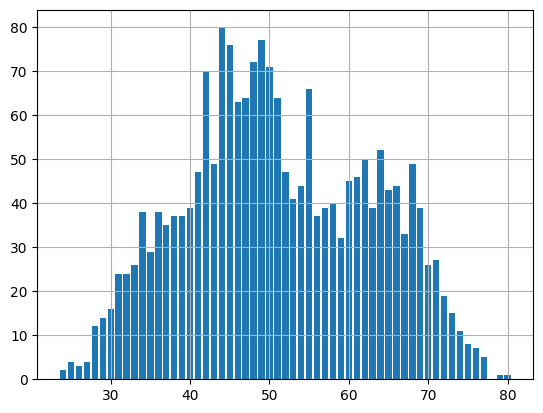

In [11]:
plt.bar(age_df.index, age_df.Age)
plt.grid(True)

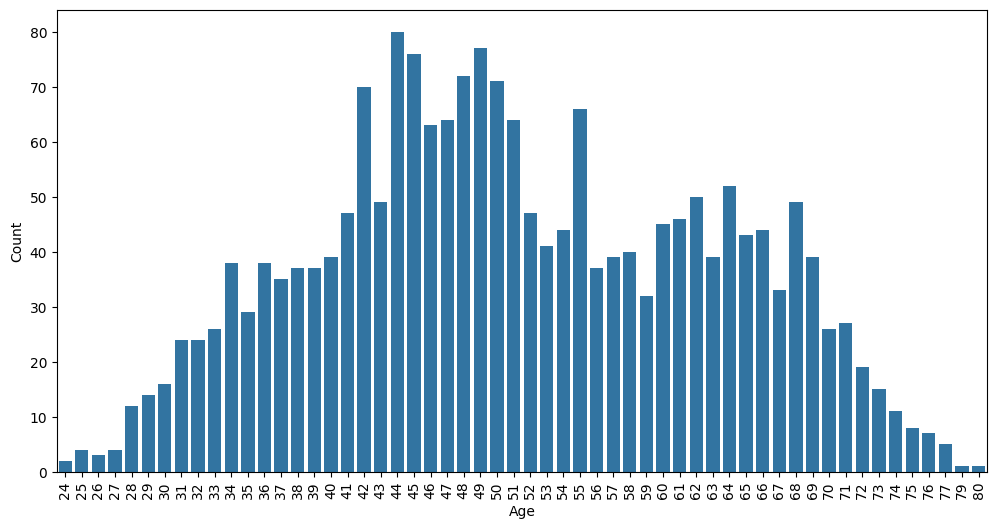

In [12]:
age_ = plt.figure(figsize = (12,6))
sns.barplot(x = age_df.index, y = age_df.Age)
plt.ylabel("Count")
plt.xticks(rotation = 90)

plt.show()

In [13]:
# How many clients accepted offer in campaings 
cmap1 = df.AcceptedCmp1.sum()/len(df)*100
cmap2 = df.AcceptedCmp2.sum()/len(df)*100
cmap3 = df.AcceptedCmp3.sum()/len(df)*100
cmap4 = df.AcceptedCmp4.sum()/len(df)*100
cmap5 = df.AcceptedCmp5.sum()/len(df)*100

print(f"Customer Offer adquisition on campaign 1 is: %{cmap1:.2f}")
print(f"Customer Offer adquisition on campaign 1 is: %{cmap2:.2f}")
print(f"Customer Offer adquisition on campaign 1 is: %{cmap3:.2f}")
print(f"Customer Offer adquisition on campaign 1 is: %{cmap4:.2f}")
print(f"Customer Offer adquisition on campaign 1 is: %{cmap5:.2f}")

Customer Offer adquisition on campaign 1 is: %6.58
Customer Offer adquisition on campaign 1 is: %1.29
Customer Offer adquisition on campaign 1 is: %7.47
Customer Offer adquisition on campaign 1 is: %7.67
Customer Offer adquisition on campaign 1 is: %7.22


In [14]:
complaint_ratio = len(df[df["Complain"] == 1]) / len(df)
complaint_ratio

0.009401286491835725

In [15]:
print("Complaint ratio of company is {:.2f}".format(complaint_ratio*100))

Complaint ratio of company is 0.94


In [16]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [17]:
"Remove cokumns that we dont need"

df.drop(columns = ['Z_CostContact', 'Z_Revenue'], inplace = True)

# Describe Analytics

In [18]:
# Calculing total spent
df["TotalSpend"] = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis = 1) 

# Calculate purchases
df["TotalPurchases"] = df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].sum(axis = 1)

# AVG of puchases value
average_value = df["TotalSpend"].sum() / df["TotalPurchases"].sum()

# Frecuency of purchase
frueq_purchase = df["TotalPurchases"].mean()

# AVG income
avg_income = df["Income"].mean()

# Calculate avg recency
recency = df["Recency"].mean()

# Total spend per category 
tot_category = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum()

In [19]:
print(f"AVG purchase value:$ {average_value:.2f}")
print(f"Frecuency of purchase: {frueq_purchase:.2f}")
print(f"Average income:$ {avg_income:.2f}")
print(f"Calculate avg recency: {recency:.2f}")
print("Total Spend")
tot_category

AVG purchase value:$ 40.79
Frecuency of purchase: 14.90
Average income:$ 51687.26
Calculate avg recency: 48.88
Total Spend


MntWines            619421
MntFruits            53283
MntMeatProducts     335607
MntFishProducts      75997
MntSweetProducts     55110
MntGoldProds         88766
dtype: int64

The average value of all the items is around 40 wich each coustmer purchasing atleast 14.90 items average. The average income turns out to be 51687

# Data Visualization

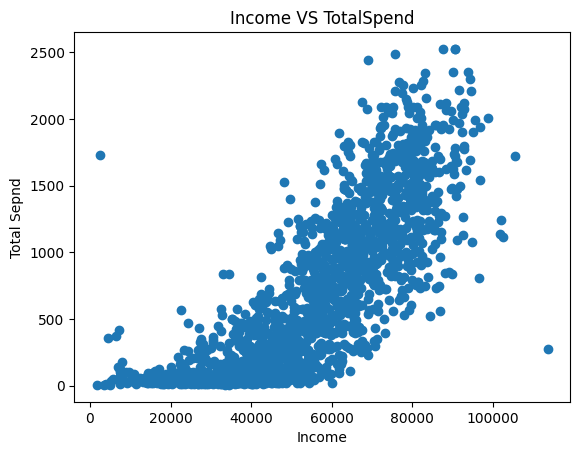

In [20]:
plt.scatter(df["Income"], df["TotalSpend"])
plt.title("Income VS TotalSpend")
plt.xlabel("Income")
plt.ylabel("Total Sepnd")

plt.show()

We can see that people whose income is between 0-80000, they tend to spend between 0-2000 or sometimes 2500, but people whose income is 100000 or above, they tend to spend less

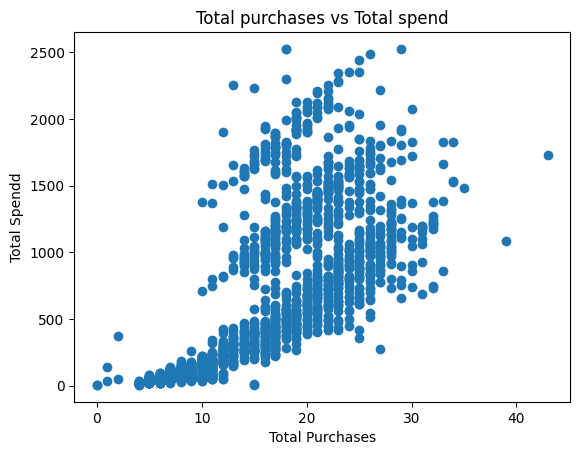

In [21]:
plt.scatter(df["TotalPurchases"], df["TotalSpend"])

plt.title("Total purchases vs Total spend")
plt.xlabel("Total Purchases")
plt.ylabel("Total Spendd")

plt.show()

Total purchases are concentrate on total purchases 8 - 30 between both its a lot of data, they spend more than total purchases 40 or above 

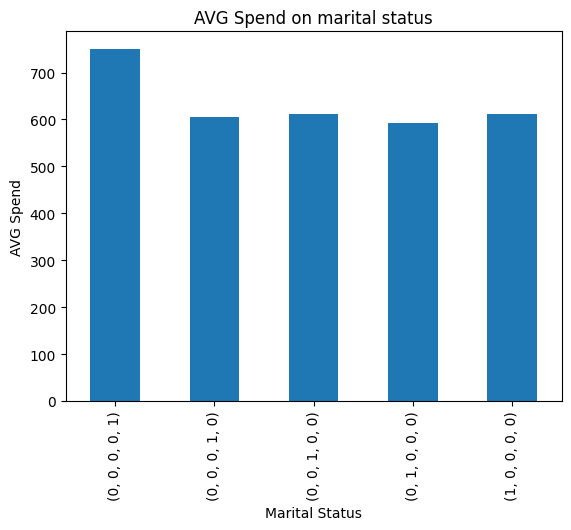

In [22]:
marital_col = ['marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow']
avg_marital_spend = df.groupby(marital_col)["TotalSpend"].mean()
avg_marital_spend.plot(kind = "bar")

plt.xlabel("Marital Status")
plt.ylabel("AVG Spend")
plt.title("AVG Spend on marital status")

plt.show()

Widows spend more than average than divorced,married,single, or together women.

In [23]:
def get_marital_status(row):
    if row["marital_Divorced"] == 1:
        return "Divorced"
    elif row["marital_Married"] == 1:
        return "Married"
    elif row["marital_Single"] == 1:
        return "Single"
    elif row["marital_Together"] == 1:
        return "Together"
    elif row["marital_Widow"] == 1:
        return "Widow"    
    else:
        return "Uknown"
    
df["Marital"] = df.apply(get_marital_status, axis = 1)

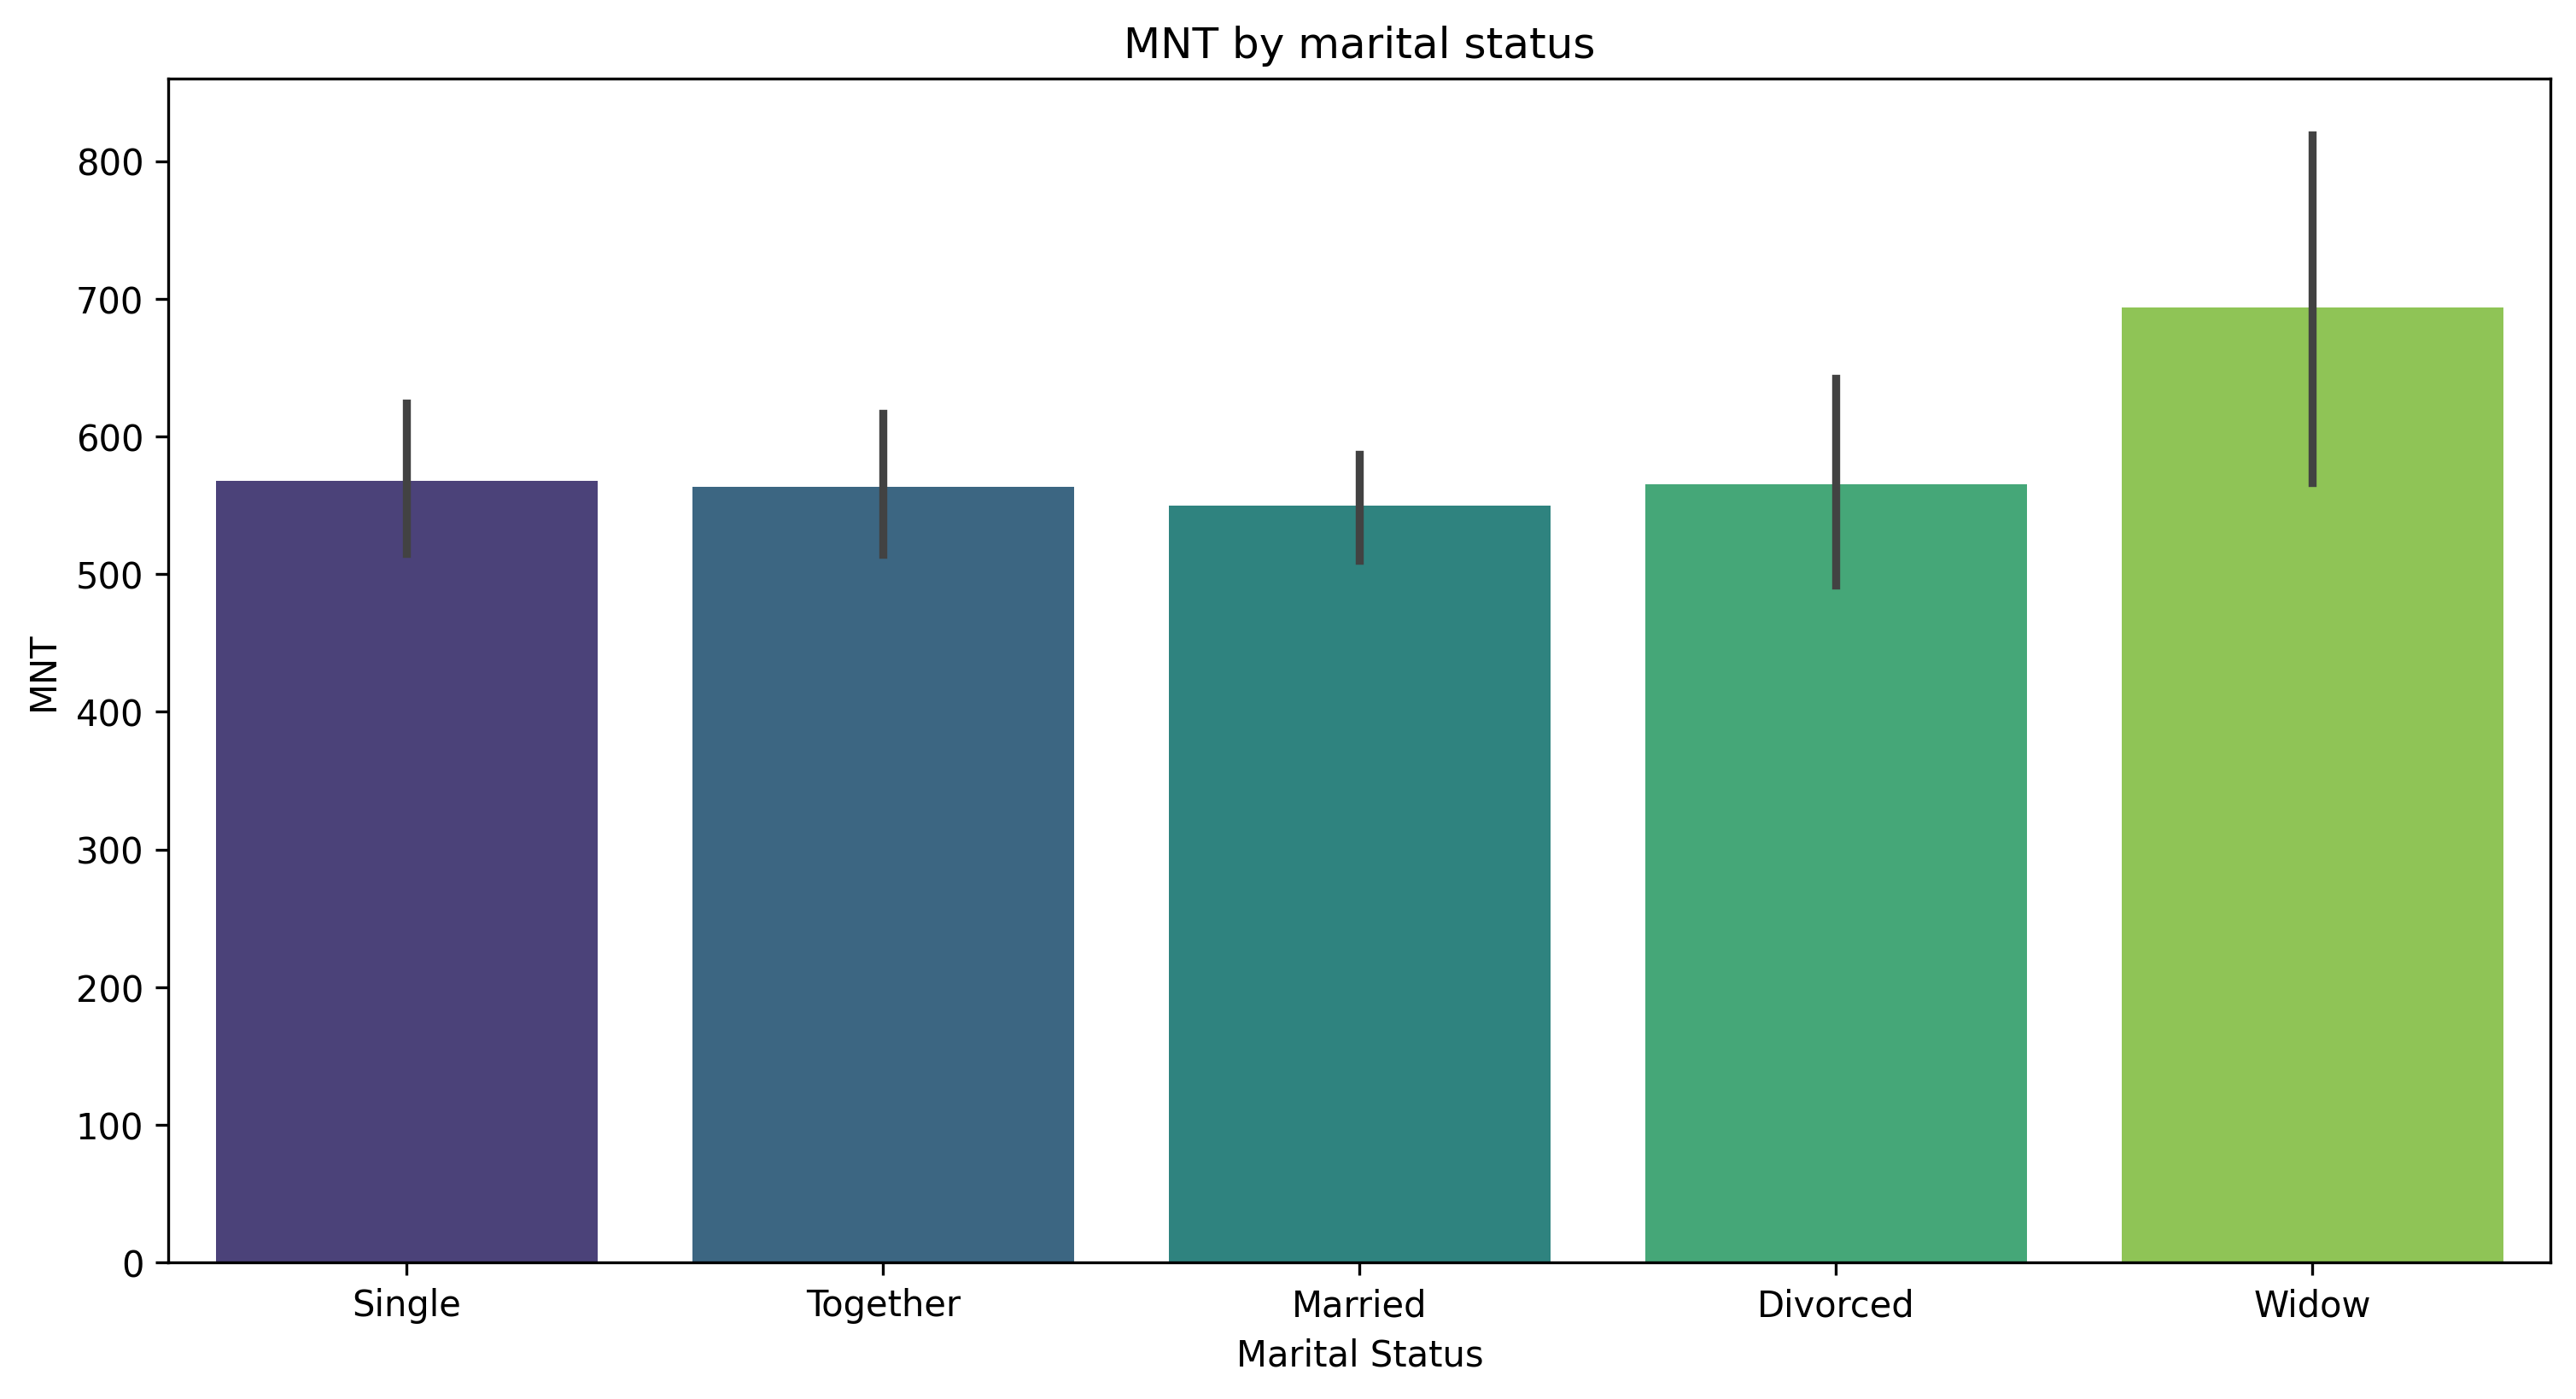

In [24]:
plt.figure(figsize=(12,6), dpi = 300)
sns.barplot(x = "Marital", y = "MntTotal", data = df, palette = "viridis")

plt.xlabel("Marital Status")
plt.ylabel("MNT")
plt.title("MNT by marital status")

plt.show()

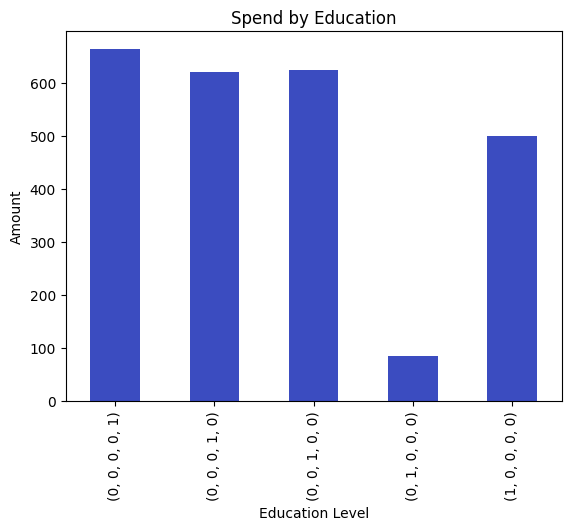

In [25]:
education_level = ['education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD']

avg_education = df.groupby(education_level)["TotalSpend"].mean()
avg_education.plot(kind = "bar", cmap = "coolwarm")

plt.title("Spend by Education")
plt.xlabel("Education Level")
plt.ylabel("Amount")

plt.show()

PhD people spend more than average than the others. The least is spend by people who have basic education

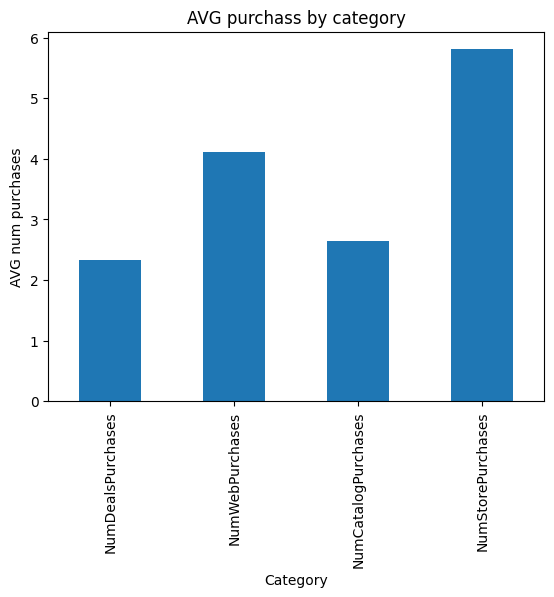

In [26]:
avg_by_category = df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].mean()
avg_by_category.plot(kind = "bar")

plt.xlabel("Category")
plt.ylabel("AVG num purchases")
plt.title("AVG purchass by category")

plt.show()

Store purchases are more bought in average than the others. The least is bought during Deals

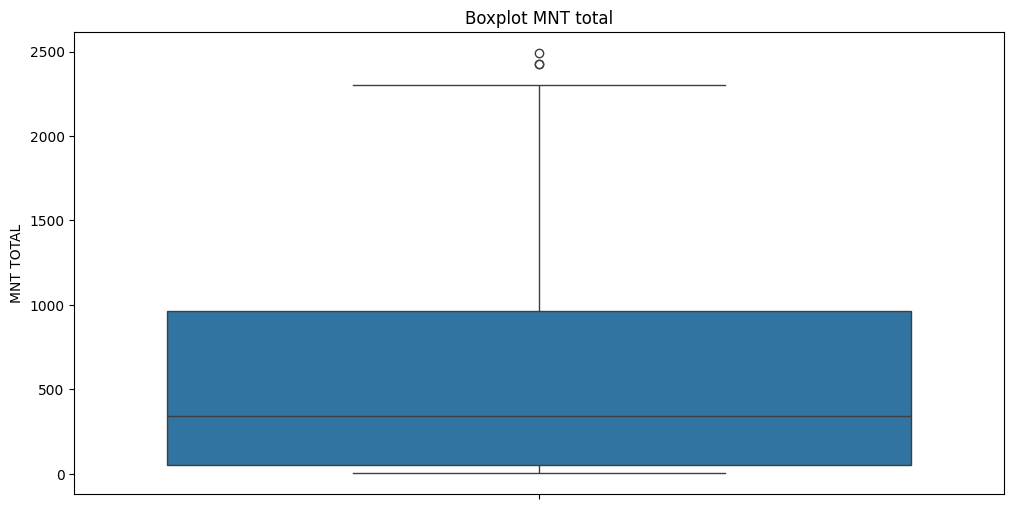

In [27]:
plt.figure(figsize = (12,6))

sns.boxplot(data = df, y="MntTotal")
plt.ylabel("MNT TOTAL")
plt.title("Boxplot MNT total")

plt.show()

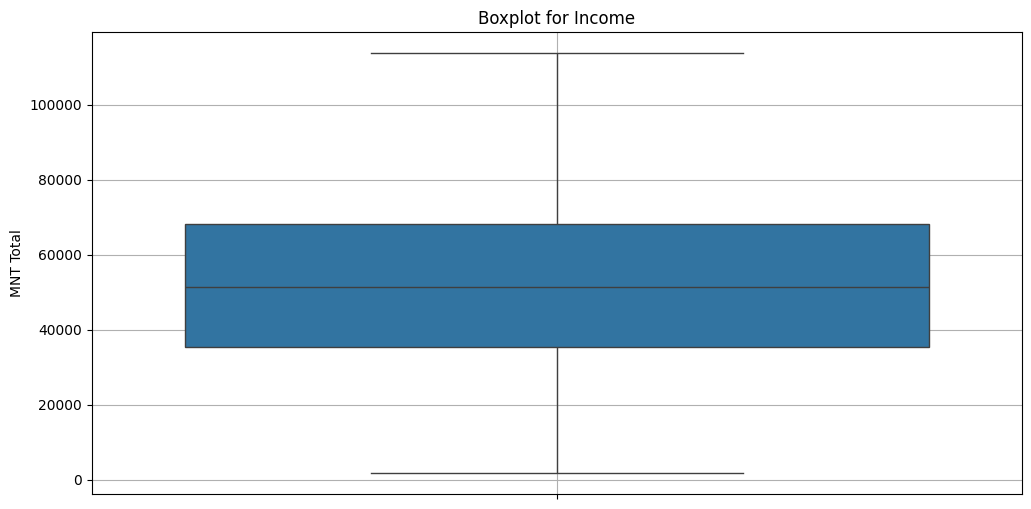

In [28]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df, y = "Income")

plt.title("Boxplot for Income")
plt.ylabel("MNT Total")
plt.grid(True)
plt.show()

## The Income is between the ranges of 37000 and 65000.


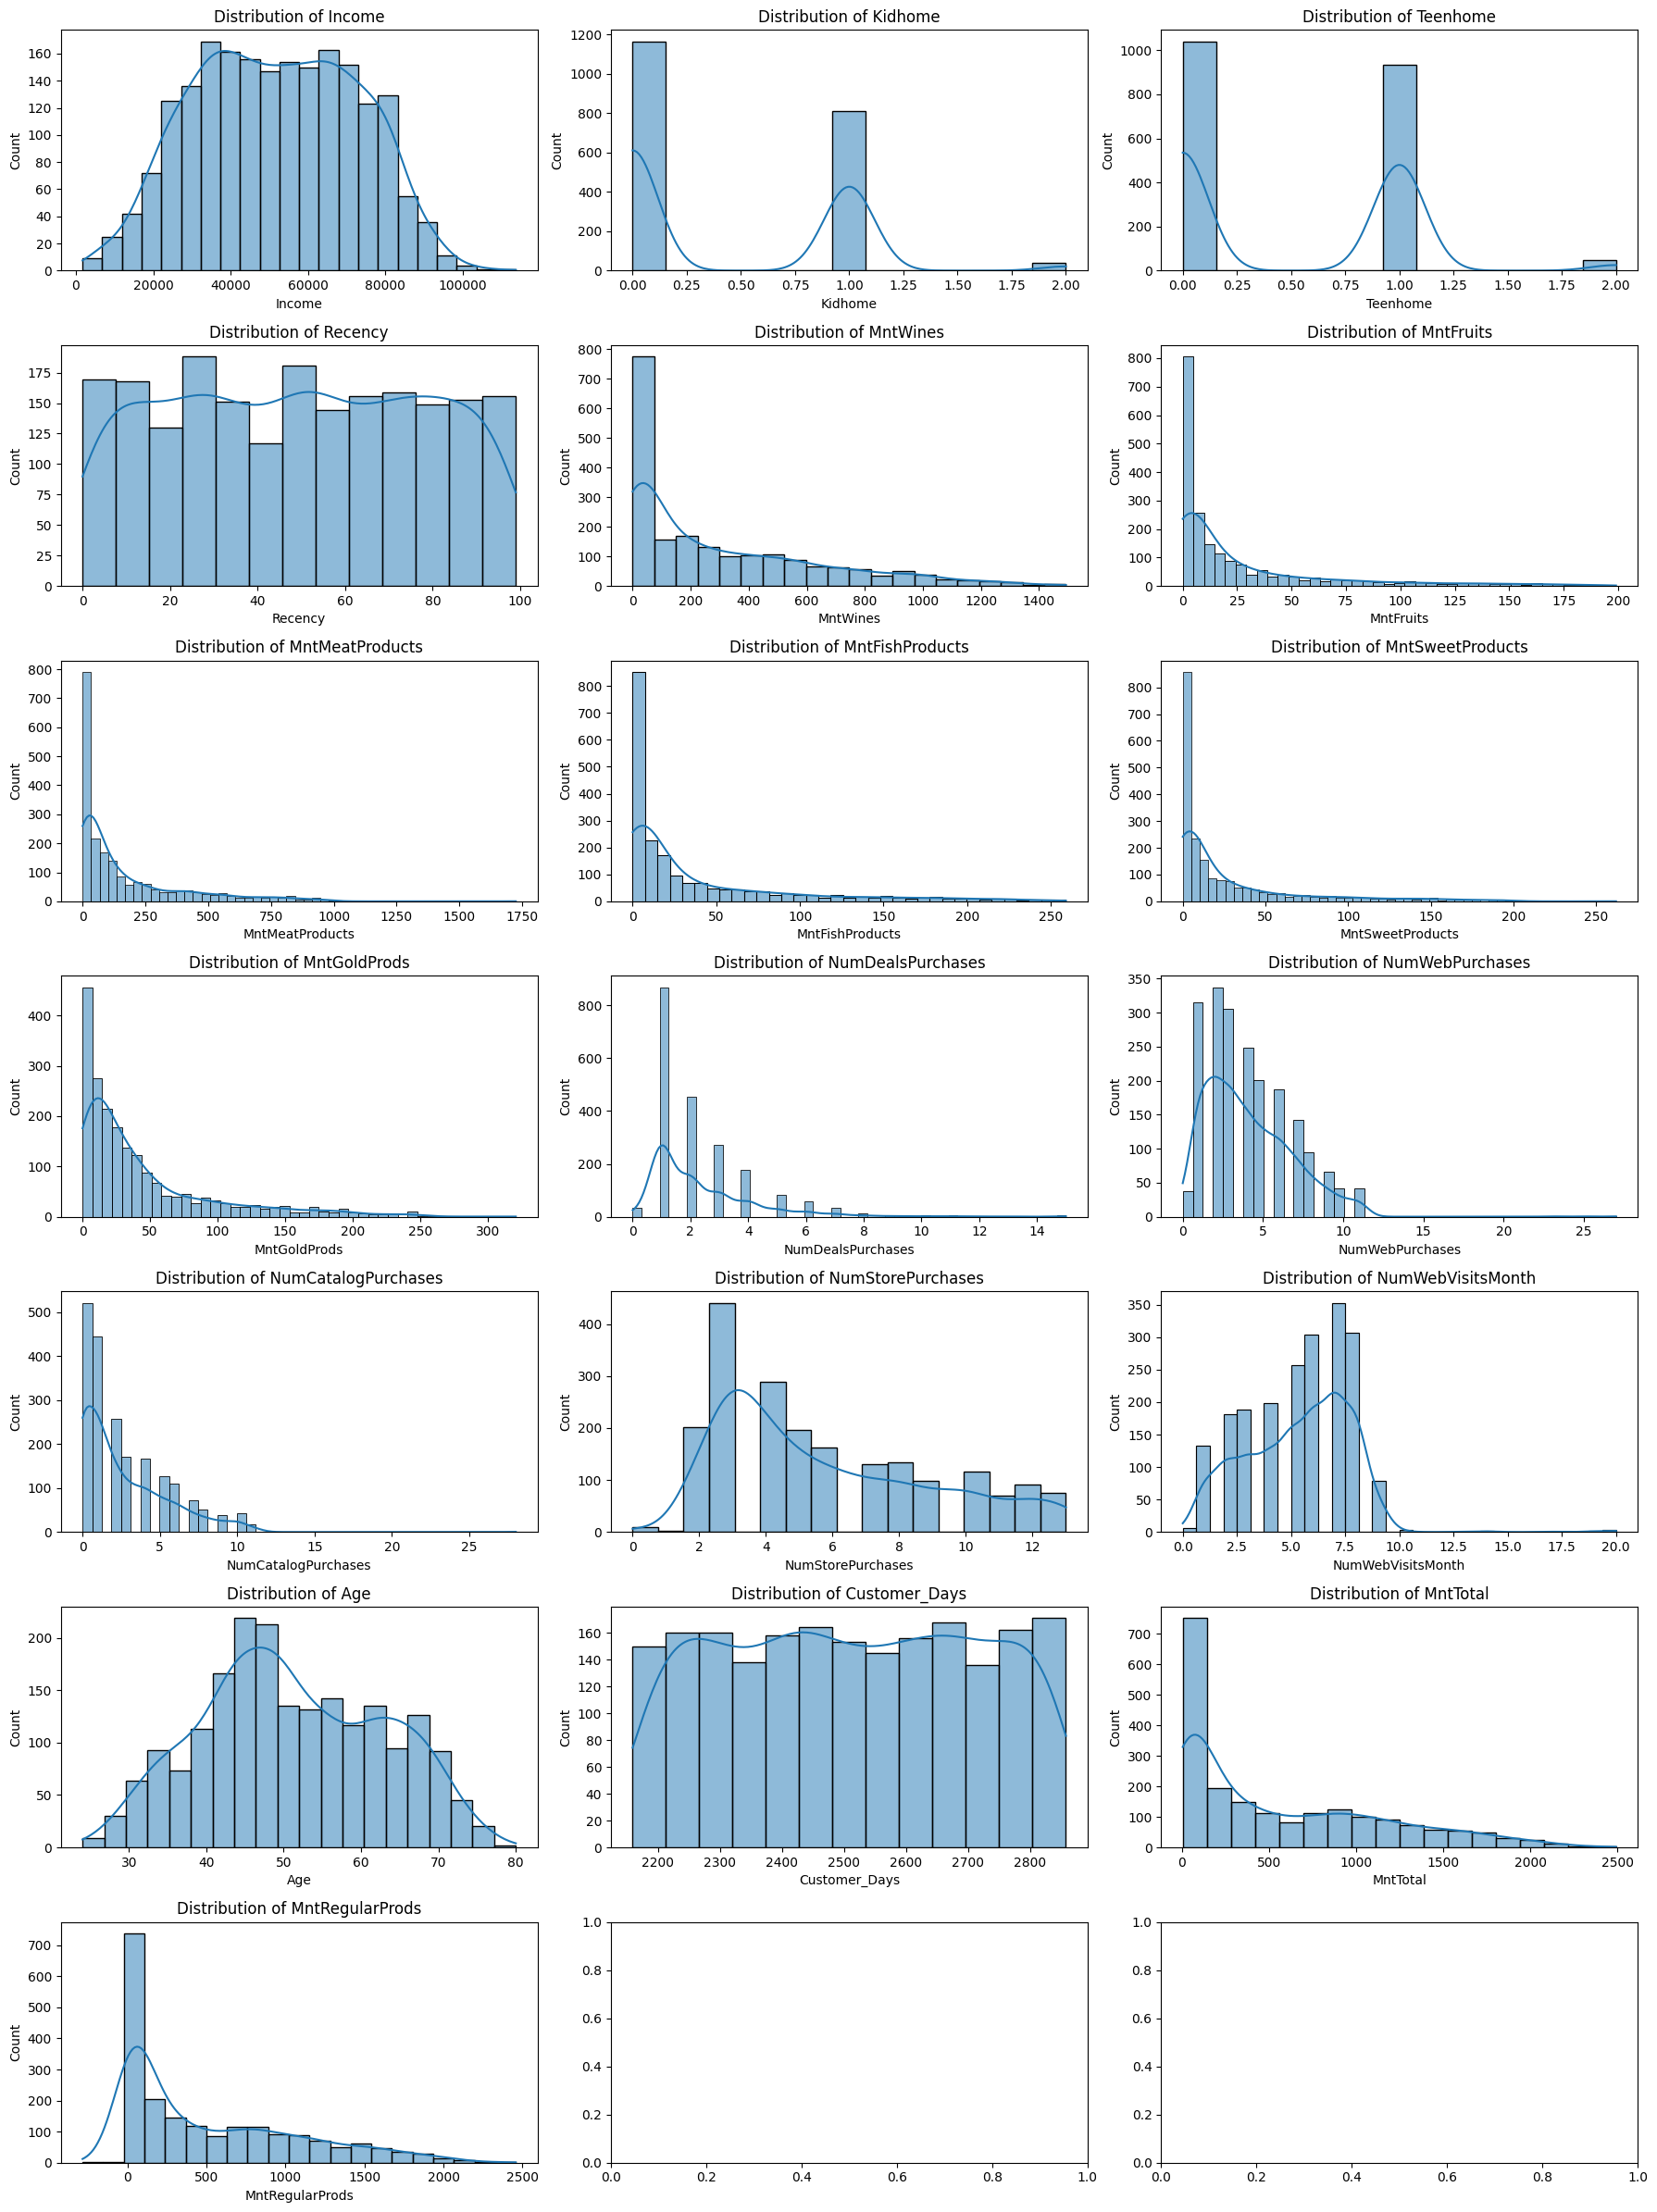

In [29]:
# List of numerical features to visualize
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days',
                      'MntTotal', 'MntRegularProds']

# Plot the distributions
fig, axes = plt.subplots(len(numerical_features) // 3 + 1, 3, figsize=(18, 24))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

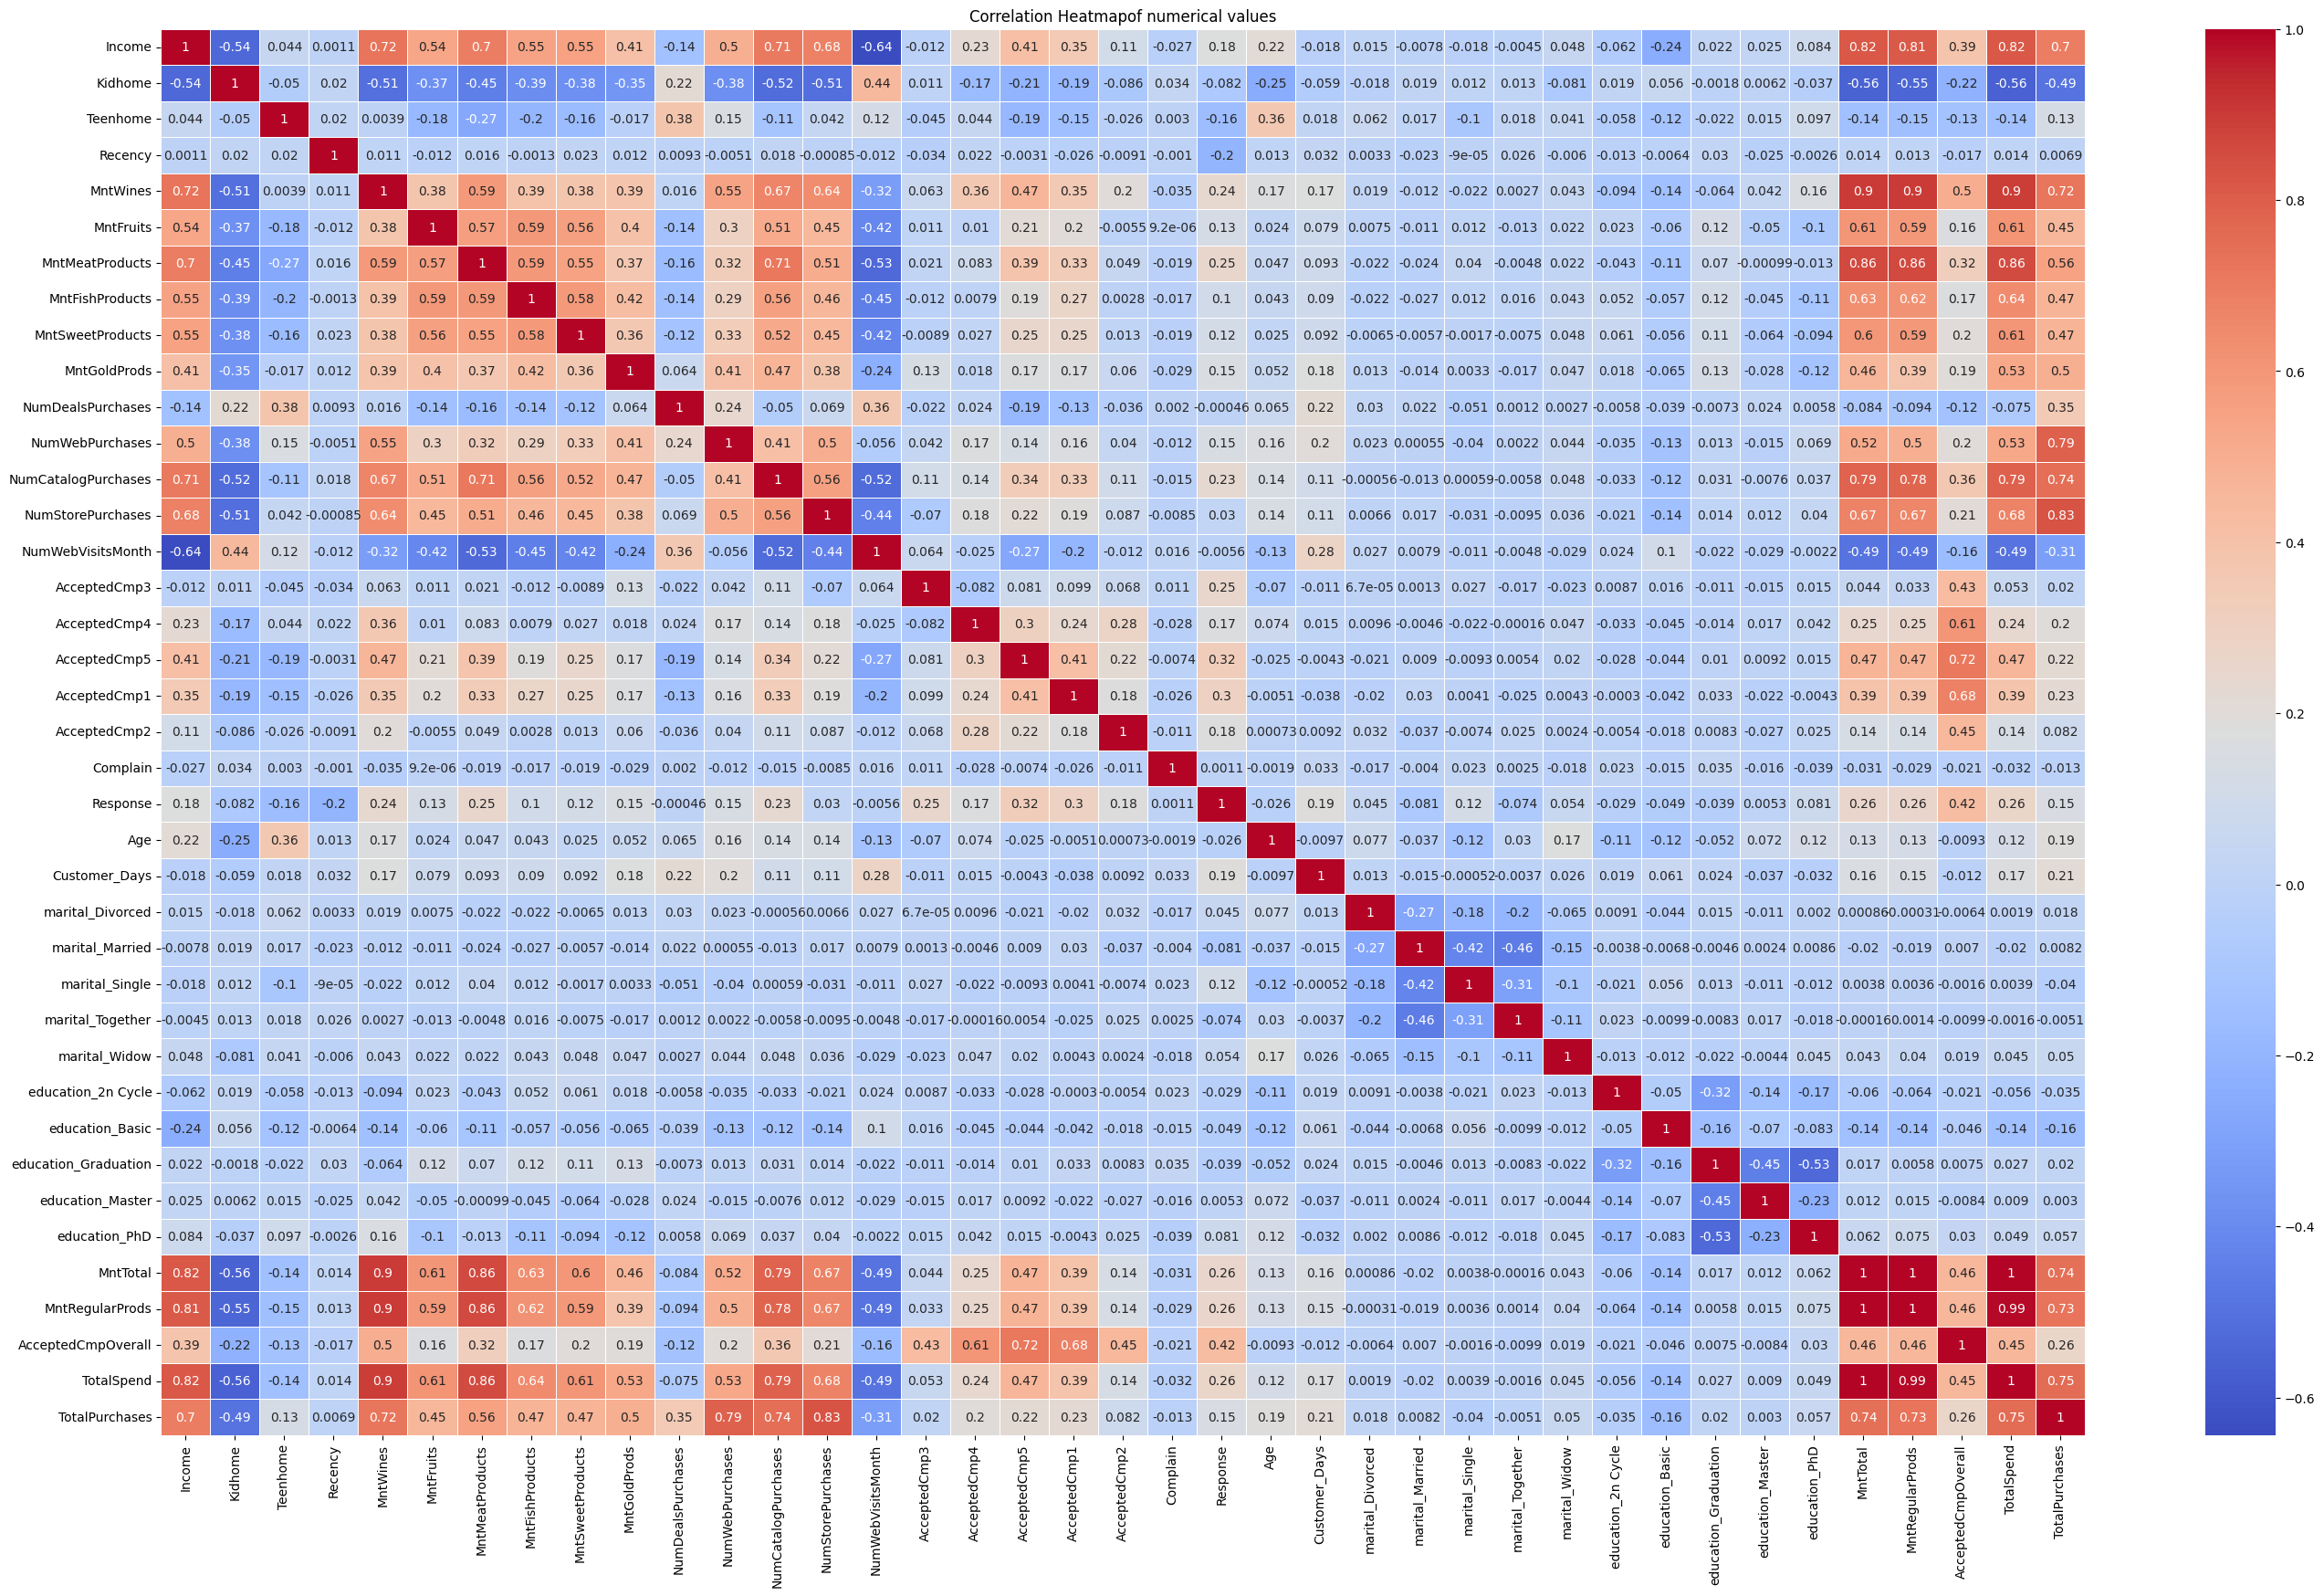

In [30]:
numeric_data = df.select_dtypes(include = ["Float64","int64"])

plt.figure(figsize = (34,20))
correlcation_matrix = numeric_data.corr()
sns.heatmap(correlcation_matrix, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmapof numerical values")
plt.show()

In [31]:
def get_relationship(row):
    if row["marital_Married"] == 1:
        return 1
    elif row["marital_Together"] ==1:
        return 1
    else:
        return 0
    
df["In_relationship"] = df.apply(get_relationship, axis = 1)

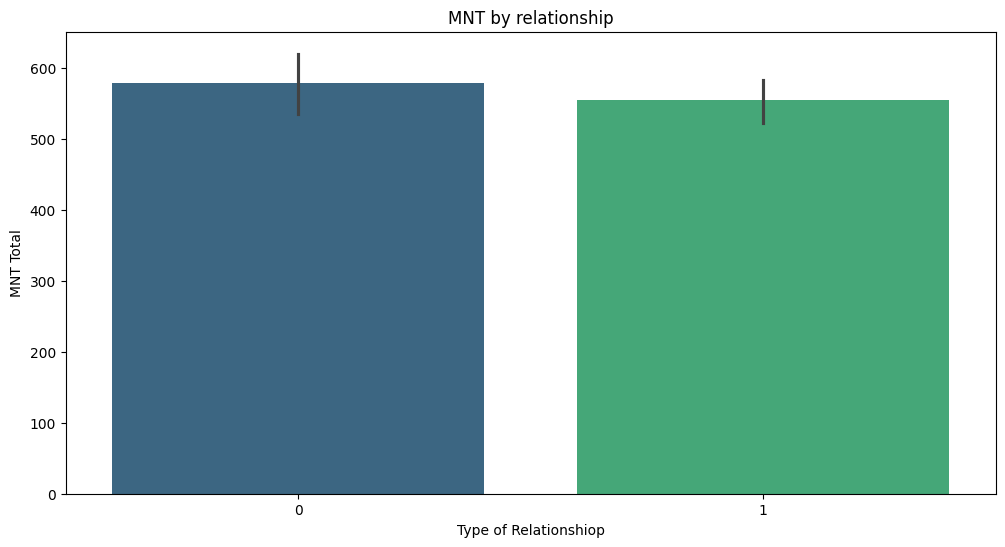

In [32]:
plt.figure(figsize = (12,6))
sns.barplot(x = "In_relationship", y = "MntTotal", data = df, palette = "viridis")

plt.title("MNT by relationship")
plt.xlabel("Type of Relationshiop")
plt.ylabel("MNT Total")

plt.show()

In [33]:
sc = StandardScaler()
cols_for_cluster = ["Income", "MntTotal", "In_relationship"]
data_scaler = df.copy()
data_scaler[cols_for_cluster] = sc.fit_transform(df[cols_for_cluster])
data_scaler[cols_for_cluster].describe()

,Income,MntTotal,In_relationship
count,2.021000e+03,2.021000e+03,2.021000e+03
mean,-1.494214e-17,-8.877389e-17,-8.965284e-17
std,1.000247e+00,1.000247e+00,1.000247e+00
min,-2.412471e+00,-9.707894e-01,-1.334135e+00
25%,-7.857505e-01,-8.823449e-01,-1.334135e+00
50%,-1.329244e-02,-3.828938e-01,7.495491e-01
75%,8.009853e-01,6.940476e-01,7.495491e-01
max,2.996281e+00,3.342179e+00,7.495491e-01


#Customer Segmentation and visualitation

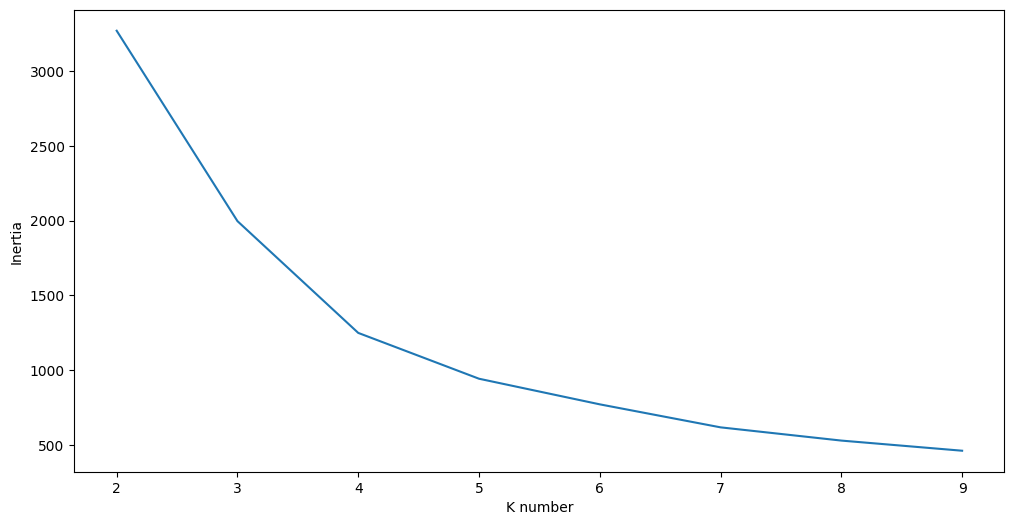

In [34]:
X = data_scaler[cols_for_cluster]
inertia_list = []
for k in range(2,10):
    inertia = KMeans(n_clusters = k, random_state = 99).fit(X).inertia_
    inertia_list.append(inertia)

plt.figure(figsize = (12,6))
plt.plot(range(2,10), inertia_list)
plt.xlabel("K number")
plt.ylabel("Inertia")
plt.show()

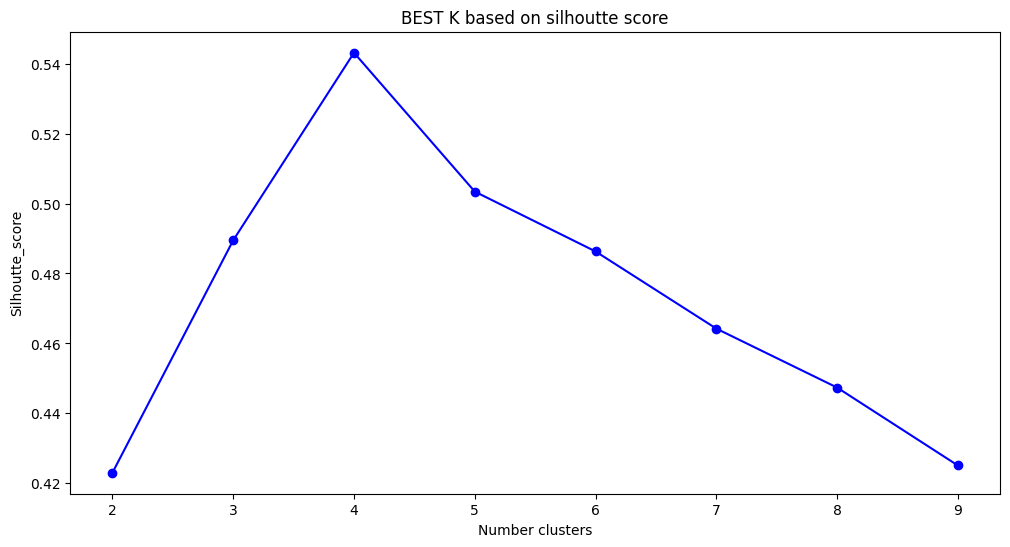

In [35]:
silhoutte_score = []
cluster_range = range(2,10)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(X)
    silhoutte_avg = silhouette_score(X, cluster_labels)
    silhoutte_score.append(silhoutte_avg)
    
plt.figure(figsize = (12,6))

plt.plot(cluster_range, silhoutte_score, marker = "o", linestyle = "-", color ="b" )
plt.xlabel("Number clusters")
plt.ylabel("Silhoutte_score")

plt.title("BEST K based on silhoutte score")
plt.show()

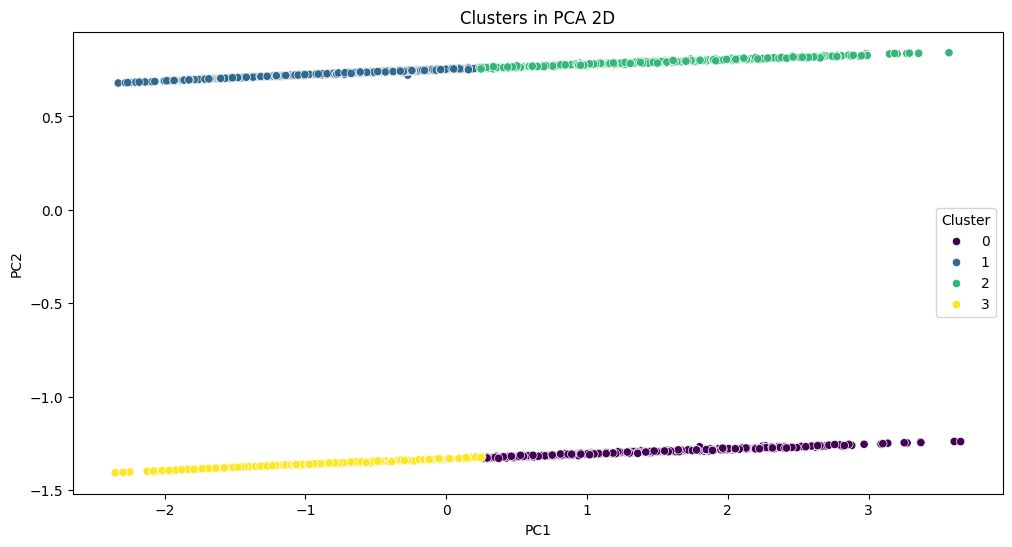

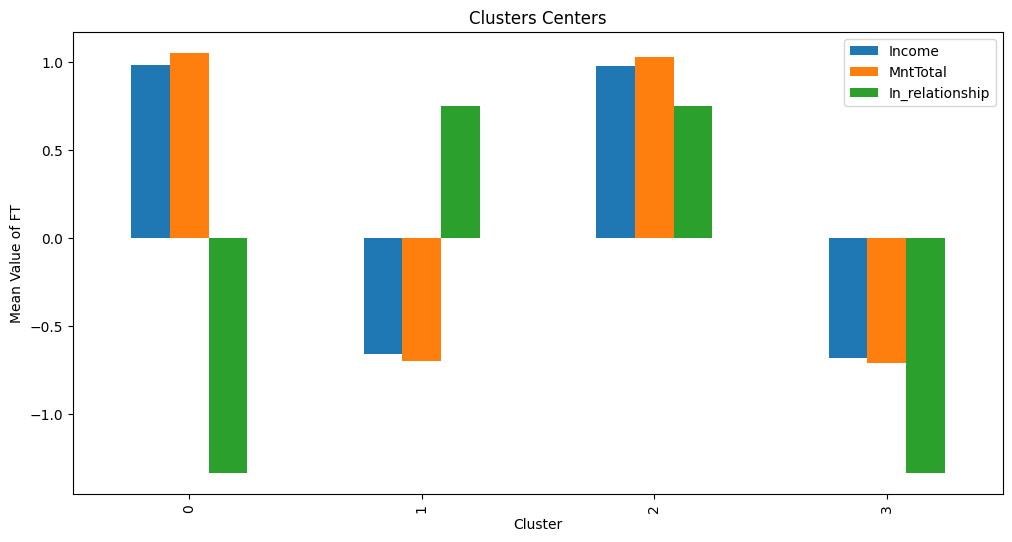

In [36]:
optimal_k = 4
k_means = KMeans(n_clusters = optimal_k, random_state = 99)
cluster_labels = k_means.fit_predict(X)

data_scaler["Cluster"] = cluster_labels

"PCA for 2 Dimensions"
pca = PCA(n_components = 2)
principal_components =pca.fit_transform(X)
pca_df = pd.DataFrame(data=principal_components, columns=["PC1","PC2"])
pca_df["Cluster"] = cluster_labels

#Scatter plot PCA 
plt.figure(figsize = (12,6))
sns.scatterplot(x= "PC1", y="PC2", hue="Cluster", data = pca_df, palette="viridis")

plt.title("Clusters in PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

#Cluster Centers
clusters_center = pd.DataFrame(k_means.cluster_centers_, columns=cols_for_cluster)
clusters_center["Cluster"] = range(optimal_k)

# Plot centers clusters
clusters_center.set_index("Cluster").plot(kind="bar", figsize=(12,6))
plt.title("Clusters Centers")
plt.xlabel("Cluster")
plt.ylabel("Mean Value of FT")

plt.show()

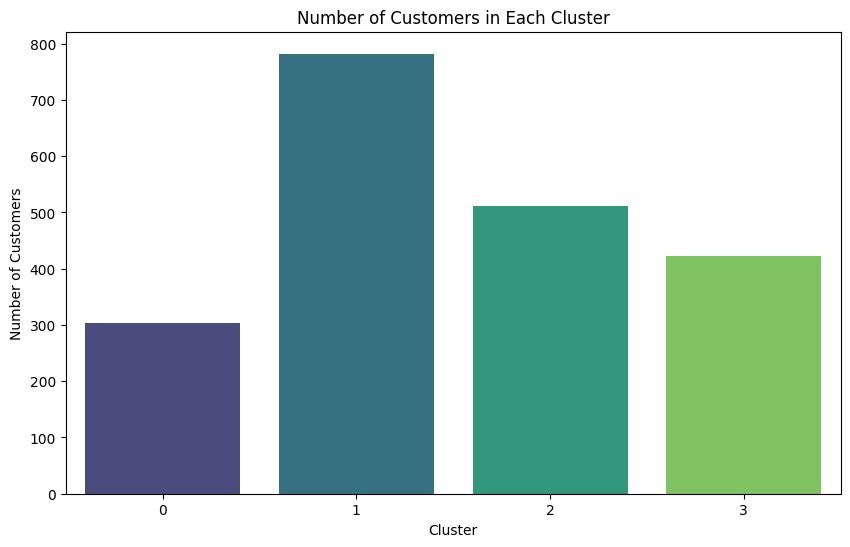

In [37]:
cluster_counts = data_scaler['Cluster'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Cluster')
plt.show()

# INFERENCE
The optimal number of clusters is 4, as indicated by both the Elbow Method and Silhouette Analysis. The Elbow Method suggests that 4 or 5 clusters could be reasonable, while the Silhouette Analysis shows the highest silhouette score for k=4.

From the bar plot, we can observe the following distribution of customers across different clusters:

Cluster 0: Approximately 800 customers (the largest cluster)

Cluster 1: Approximately 500 customers 

Cluster 2: Approximately 450 customers

Cluster 3: Approximately 300 customers

This indicates that Cluster 0 contains the highest number of customers, followed by Cluster 1. 

# RECOMMENDATIONS
Targeted Marketing:

Cluster , being the largest customer group, should have focused marketing efforts to enhance engagement. Tailored promotions, discounts, and loyalty programs can aid in retaining and boosting their spending habits. For Cluster 1, similar approaches as Cluster 0 can be utilized, but with messages customized to their unique preferences and behaviors.

Customer Retention Techniques:

Clusters 2 and 3, with smaller customer numbers, require a thorough analysis of their traits and actions to pinpoint any specific needs or challenges causing the lower customer count. Strategies like enhancing customer support, providing exclusive offers, and addressing pain points can aid in retention.

Resource Distribution:

Deploy marketing and customer service resources according to the cluster sizes. While Cluster 1 should receive significant attention due to its extensive customer base, it's crucial not to overlook Clusters 0 and 3, as they could potentially develop into lucrative markets with the right approach.

In-depth Examination:

Conduct a detailed exploration of each cluster to grasp their demographics, buying patterns, and preferences better. This insight will facilitate the creation of more individualized and impactful marketing strategies for each cluster.